# Neural Net Demo


## Python Wiederholung

Python ist eine vielseitige und weit verbreitete Programmiersprache, die sich besonders gut für die Datenanalyse und das maschinelle Lernen eignet. In dieser kurzen Einführung werden wir einige grundlegende Konzepte von Python kennenlernen und sehen, wie wir diese verwenden können, um mit dem scikit-learn-Framework einfache maschinelle Lernmodelle zu erstellen.

In Python speichern wir Daten in Variablen. Variablen können verschiedene Datentypen enthalten, wie z. B. Text (Strings), ganze Zahlen (Integer) und Dezimalzahlen (Floats). In dieser Zelle lernen Sie, wie Sie Variablen in Python erstellen und verwenden.

In [54]:
# Einführung in Python: Variablen und Datentypen

# Variablen speichern Daten, die Sie später verwenden können. Hier erstellen wir eine Variable namens 'name' und weisen ihr den Wert 'Alice' zu.
name = "Alice"  # Dies ist ein String (Text)

# Sie können auch Zahlen in Variablen speichern:
age = 30  # Dies ist ein Integer (ganze Zahl)

# Python kann auch Gleitkommazahlen (Zahlen mit Dezimalstellen) verarbeiten:
height = 5.5  # Dies ist eine Float (Dezimalzahl)

# Print-Anweisungen helfen Ihnen zu sehen, was in Variablen gespeichert ist:
print("Name:", name)
print("Alter:", age)
print("Größe:", height)

Name: Alice
Alter: 30
Größe: 5.5


Listen sind eine spezielle Art von Variablen, die mehrere Werte gleichzeitig speichern können. Hier zeigen wir Ihnen, wie Sie Listen erstellen, auf ihre Elemente zugreifen und einfache Operationen wie das Hinzufügen von Elementen oder das Berechnen eines Durchschnitts durchführen. In der Welt des maschinellen Lernens arbeiten wir jedoch häufig mit großen Mengen numerischer Daten, für die NumPy-Arrays besser geeignet sind als Listen. NumPy ist eine Bibliothek in Python, die effiziente und leistungsstarke Arrays bietet, die schneller und vielseitiger sind als herkömmliche Listen. NumPy-Arrays ermöglichen es uns, mathematische Operationen auf großen Datensätzen viel effizienter durchzuführen, was besonders bei der Arbeit mit maschinellen Lernmodellen entscheidend ist.

In [55]:
# Listen: Mehrere Werte in einer einzelnen Variable speichern

# Eine Liste kann mehrere Elemente enthalten. Hier ist eine Liste von Altersangaben:
ages = [25, 30, 35, 40]  # Dies ist eine Liste von Integern

# Sie können auf einzelne Elemente in einer Liste zugreifen, indem Sie deren Position verwenden (beginnend bei 0):
print("Erstes Alter in der Liste:", ages[0])
print("Zweites Alter in der Liste:", ages[1])

# Sie können auch Elemente zu einer Liste hinzufügen:
ages.append(45)
print("Aktualisierte Liste der Altersangaben:", ages)

# Grundlegende Listenoperationen:
average_age = sum(ages) / len(ages)  # Durchschnittsalter berechnen
print("Durchschnittsalter:", average_age)

# Sie können dem Programm mitteilen, dass sie eine Bibliothek benutzen möchten, indem Sie diese importieren. Das geschieht mit dem "import" Statement
import numpy 

# Bibliotheken können Sie kostenfrei mit Hilfe von pip ("Pip Installs Packages") installieren

#konvertieren einer Liste zu einem NumPy Array
ages = numpy.array(ages)

Erstes Alter in der Liste: 25
Zweites Alter in der Liste: 30
Aktualisierte Liste der Altersangaben: [25, 30, 35, 40, 45]
Durchschnittsalter: 35.0


## Imports

Typischerweise werden Bibliotheken immer am Anfang des Codes importiert, wir werden heute allerdings etwas von der Norm abweichen und manche Sachen erst importieren, wenn wir sie benötigen

## Installation notwendiger Bibliotheken

Bevor wir mit TensorFlow und Keras arbeiten können, müssen wir sicherstellen, dass diese Bibliotheken installiert sind. Die folgende Zelle installiert TensorFlow, welches Keras enthält.

In [56]:
from sklearn.datasets import fetch_openml, load_diabetes
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, balanced_accuracy_score, mean_squared_error, mean_absolute_error

import numpy as np
import time
import joblib
import os

# Add TensorFlow and Keras imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Set TensorFlow logging level (optional)
import logging
tf.get_logger().setLevel(logging.ERROR)

## Klassifikation

Klassifikation befasst sich damit, wie der Name sagt Daten einer festen Klasse zuzuordnen, z.B. das Bild eines Apfels der Klasse *Apfel* und das Bild einer Birne der Klasse *Birne*.

### Datenset

Es gibt mehrere Datensets die öffentlich zugänglich sind, eines davon ist das sogenannte MNIST Datenset, das handgeschriebene Ziffern beinhaltet. Die Klassen sind also die Zahlen 0-9. Zu Beginn schauen wir uns zusätzlich den Shape, also die Form unserer Daten an, um zu verstehen wie das Datenset aufgebaut ist.


In [57]:
mnist = fetch_openml('mnist_784')

# formatieren der Daten als numpy array, um sie später einfacher ansprechen und modifizieren zu können
full_data = mnist.data.to_numpy()
full_labels = mnist.target.to_numpy()
# Um etwas Zeit zu sparen, beschränken wir uns auf die ersten 1000 Bilder.
n_bilder = 1000
data = full_data[:n_bilder]
labels = full_labels[:n_bilder]
print(data.shape)
labels.shape

(1000, 784)


(1000,)

### Visualisieren der Daten

Oft ist es hilfreich bevor man sich an die eigentliche Analyse macht, den Aufbau der vorhandenen Daten anzuschauen. Hierzu benutzen wir das Modul Matplotlib, eine bekannte Bibliothek zum Erstellen von Grafiken. Bei der Visualisierung lohnt es sich darüber nachzudenken WIE man die Daten darstellen möchte. In diesem Fall ist es dankbarerweise recht einfach, da die Daten Bilder sind.

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

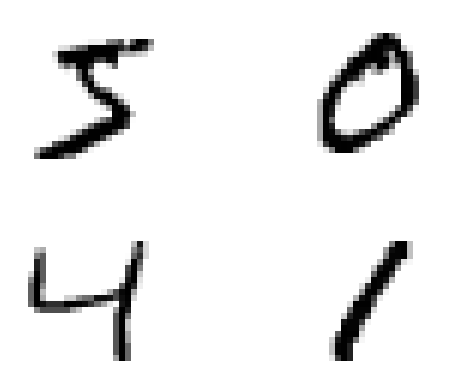

In [58]:
# Erstellen eines Bildes aus 2 x 2 untergeordneten Bildern
fig, ax = plt.subplots(2,2)
# Erstellen einer Liste, diese dient zur Speicherung der Indices der Bilder aus data, die wir anzeigen wollen.
images_to_present = [0,1,2,3]
# Der 'range' Befehl erstellt eine Liste von 0 bis zur genannten Zahl, die Zahl nicht eingeschlossen, wenn man zwei Zahlen angibt, dann wird ab der ersten genannten Zahl (eingeschlossen)
#  bis zur zweiten Zahl (ausgeschlossen) eine Liste erstellt # z.B. range(4) = [0, 1, 2, 3]  range(2,4) = [2,3] 
for i in range(4):
    # bestimmen in welches Bild wir die Daten eintragen
    first = int(np.floor(i/2))
    second = int(np.floor(i % 2)) 

    # Zeigen des Bildes an der richtigen Position, hierbei werden die Daten mit 'reshape' umformatiert, sodass sie in das von der Funktion erwartete Format passen
    ax[first][second].imshow(data[images_to_present[i]].reshape(28,28), cmap=plt.cm.gray_r)
    ax[first][second].axis('off')
ax

### Die eigentliche Klassifikation

Die Klassifikation an sich ist eigentlich sehr einfach. Wir wählen aus der von scikit-learn bereitgestellten Menge von Klassifikationsalgorithmen einen aus, hier ersetzen wir SVM durch ein neuronales Netzwerk.

### Neuronale Netzwerke und ihre Komponenten

Ein neuronales Netzwerk besteht aus verschiedenen Schichten (Layers), die miteinander verbunden sind. In TensorFlow/Keras können wir diese Schichten einfach definieren und kombinieren:

- **Dense**: Vollständig verbundene Schicht, in der jedes Neuron mit allen Neuronen der vorherigen Schicht verbunden ist
- **Flatten**: Wandelt mehrdimensionale Eingaben (wie Bilder) in einen eindimensionalen Vektor um
- **Dropout**: Eine Regularisierungstechnik, die zufällig einen Teil der Neuronen während des Trainings "ausschaltet", um Überanpassung zu vermeiden



In [ ]:

# Importieren der grundlegenden Layer-Typen für unser neuronales Netzwerk
from tensorflow.keras.models import Sequential  # Für sequentielle Modelle (Layer für Layer)
from tensorflow.keras.layers import Dense       # Vollständig verbundene Schicht
from tensorflow.keras.layers import Flatten     # Umwandlung mehrdimensionaler Daten in 1D
from tensorflow.keras.layers import Dropout     # Verhindert Überanpassung durch zufälliges Deaktivieren von Neuronen

# Dropout ist besonders wichtig, um Overfitting zu vermeiden:
# - Es deaktiviert zufällig einen bestimmten Prozentsatz an Neuronen während des Trainings
# - Dadurch wird das Netzwerk robuster und lernt verschiedene Merkmale zu erkennen
# - Im obigen Beispiel deaktivieren wir 20% der Neuronen mit Dropout(0.2)



# One-hot encode the labels for neural network classification
labels_onehot = to_categorical(labels.astype('int'))

# Create a simple neural network model
nn_classifier = Sequential([
    # Flatten the 784 pixels into a single vector
    Flatten(input_shape=(784,)),
    # Hidden layers
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    # Output layer with 10 neurons (one for each digit)
    Dense(10, activation='softmax')
])

# Compile the model
nn_classifier.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
nn_classifier.summary()

# Train the model
nn_classifier.fit(
    data, 
    labels_onehot, 
    epochs=5,
    batch_size=32,
    verbose=1
)

## Und jetzt?

Wie bestimmen wir wie gut unser Modell eigentlich ist?


### 

In [61]:
test_data = full_data[10000:11000]
test_labels = full_labels[10000:11000]
test_labels_onehot = to_categorical(test_labels.astype('int'))

def evaluate_nn(model, X_test, y_test):
    # For raw labels (not one-hot encoded)
    if len(y_test.shape) == 1 or y_test.shape[1] == 1:
        predictions_proba = model.predict(X_test)
        predictions = np.argmax(predictions_proba, axis=1).astype(str)
        # Make sure y_test is string type for comparison
        y_test_str = y_test if y_test.dtype == np.dtype('O') else y_test.astype(str)
        print(f'Accuracy: {np.round(accuracy_score(y_true=y_test_str, y_pred=predictions) * 100, decimals=3)}%')
        print(f'Balanced Accuracy: {np.round(balanced_accuracy_score(y_true=y_test_str, y_pred=predictions) * 100, decimals=3)}%')
    else:
        # Model evaluation with Keras
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print(f'Accuracy: {np.round(accuracy * 100, decimals=3)}%')

# Evaluate using our raw labels
evaluate_nn(nn_classifier, test_data, test_labels)

32/32 [==============================] - 0s 3ms/step
Accuracy: 80.0%
Balanced Accuracy: 80.0%


Ein Modell ist normalerweise sehr gut an die zu trainierenden Daten angepasst. Um die wirkliche Qualität zu bestimmen, muss man auf ungesehenen Daten trainieren. Wenn wir auf ungesehenen Daten testen, wird die Genauigkeit oft wesentlich schlechter


Leider haben wir nicht immer den Luxus eines riesigen Datensets, was dann?

### Train Test split

Ein train test split, teilt das Datenset in einen Trainings- und einen Testteil auf. Dies ermöglicht uns die spätere Evaluation eines vollen Datensatzes

In [62]:
from sklearn.model_selection import train_test_split

t_ini = time.time()

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, shuffle=True, stratify=labels)

# Convert labels to one-hot encoded format for neural network training
y_train_onehot = to_categorical(y_train.astype('int'))
y_test_onehot = to_categorical(y_test.astype('int'))

# Create and compile a new neural network model
nn_classifier = Sequential([
    Flatten(input_shape=(784,)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

nn_classifier.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
nn_classifier.fit(
    X_train, 
    y_train_onehot, 
    epochs=5,
    batch_size=32,
    validation_data=(X_test, y_test_onehot),
    verbose=1
)

# Evaluate using our custom function (with raw labels)
evaluate_nn(nn_classifier, X_test, y_test)
print(f"Training time: {time.time()-t_ini:.2f} seconds")

Epoch 1/5
25/25 [==============================] - 1s 19ms/step - loss: 40.8018 - accuracy: 0.3462 - val_loss: 10.8941 - val_accuracy: 0.5950
Epoch 2/5
25/25 [==============================] - 0s 9ms/step - loss: 8.2487 - accuracy: 0.6675 - val_loss: 8.2052 - val_accuracy: 0.6700
Epoch 3/5
25/25 [==============================] - 0s 8ms/step - loss: 4.3388 - accuracy: 0.7625 - val_loss: 5.7350 - val_accuracy: 0.7350
Epoch 4/5
25/25 [==============================] - 0s 8ms/step - loss: 3.2745 - accuracy: 0.7862 - val_loss: 4.1212 - val_accuracy: 0.7500
Epoch 5/5
7/7 [==============================] - 0s 3ms/step
Accuracy: 77.5%
Balanced Accuracy: 76.9%
Training time: 2.31 seconds


### k-fold Cross Validation

Eine k-fold cross validation führt mehrere train test splits auf den Daten durch und trainiert das neuronale Netzwerk immer wieder neu. So kann der Fehler genauer abgeschätzt werden.

In [63]:
from sklearn.model_selection import KFold
import numpy as np

# Manual cross-validation for neural networks
def nn_cross_val_score(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Convert to one-hot encoding
        y_train_onehot = to_categorical(y_train.astype('int'))
        
        # Create and train model
        model = Sequential([
            Flatten(input_shape=(784,)),
            Dense(64, activation='relu'),
            Dense(10, activation='softmax')
        ])
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train_onehot, epochs=3, verbose=0)
        
        # Predict and calculate balanced accuracy
        y_pred_proba = model.predict(X_test, verbose=0)
        y_pred = np.argmax(y_pred_proba, axis=1).astype(str)
        y_test_str = y_test.astype(str)  # Ensure consistent type for comparison
        scores.append(balanced_accuracy_score(y_test_str, y_pred))
    
    return np.array(scores)

# Run cross-validation
cv_scores = nn_cross_val_score(data, labels, n_splits=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.70221457 0.76359396 0.74859159 0.74898313 0.81182755]
Mean CV score: 0.7550


### Wie benutze ich das weiter?

Keras bietet ein eingebautes Speicher- und Ladesystem mit Hilfe von model.save und models.load_model

In [64]:
# Save a Keras model
save_path = os.path.join('.', 'NNModel.keras')
nn_classifier.save(save_path)
print(f"Model saved to {save_path}")

Model saved to .\NNModel


und geladen werden:

In [65]:
# Load a Keras model
loaded_model = keras.models.load_model(save_path)
print("Model loaded successfully")

Model loaded successfully


Dann können mit Hilfe von nn_classifier.predict Vorhersagen auf neuen, unbekannten Daten getroffen werden

## Regression

Regression befasst sich mit der Vorhersage von fortlaufenden numerischen Werten, so z.B. die Zeit die zur Durchführung eines Arbeitsschritts abhängig vom Material gebraucht wird.


### Datenset

Auch hier benutzen wir wieder ein öffentlich verfügbares Datenset, das Diabetes Datenset. Im Diabetes Datenset wurden die Daten von 442 Diabetes-Patienten erfasst, um genau zu sein:

* Alter
* Geschlecht
* BMI
* durchschnittlicher Blutdruck
* total serum cholesterol
* low-density lipoproteins
* total cholesterol
* log of serum triglycerides level
* Blutzuckerniveau

Diese sollen benutzt werden um den Krankheitsverlauf im nächsten Jahr  zu bestimmen. Für den Anfang beschränken wir uns hier auf Alter und Blutzuckerniveau.

In [66]:
diabetes = load_diabetes()
full_data = diabetes.data
print(diabetes.DESCR)
target = diabetes.target
test = full_data.T
sub_data= full_data[:, [0, -1]]
print(full_data.shape)
print(sub_data.shape)
target.shape

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

(442,)

## Visualisierung

Auch hier visualisieren wir die Daten erneut, da wir uns nur auf die Spalten Alter und Blutzuckerniveau beschräneken, können wir dies in einem 3D plot visualisieren.

C:\Users\tedle\AppData\Local\Temp\ipykernel_22828\429938204.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


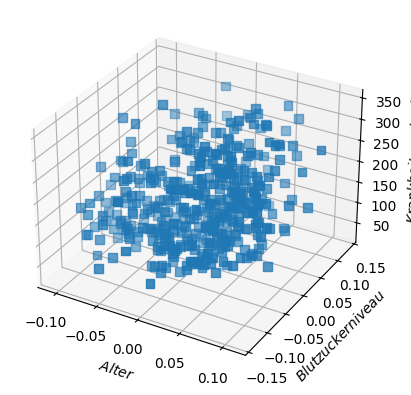

In [67]:

fig = plt.figure()
# add a single subplot
ax = fig.add_subplot(111, projection='3d')
data = sub_data.T
ax.set_xlabel(f'$Alter $')
ax.set_ylabel(f'$Blutzuckerniveau$')
ax.set_zlabel(f'$Krankheitsverlauf$')
ax.scatter(data[0], data[1], target, marker='s', s=40)
fig.show()


Alle Variablen wurden normalisiert, sodass die Summe der Quadrate 1 ergibt.

## Die eigentliche Regression

Ähnlich wie bei der Klassifikation können wir hier aus einer breiten Menge von Algorithmen wählen. Hier verwenden wir ein neuronales Netzwerk.

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split the data
X_train, X_test, y_train, y_test = train_test_split(sub_data, target, random_state=42, test_size=0.2)

# Create a neural network for regression
nn_regressor = Sequential([
    Dense(16, activation='relu', input_shape=(2,)),
    Dense(8, activation='relu'),
    Dense(1)  # No activation for regression output
])

# Compile the model for regression
nn_regressor.compile(
    optimizer='adam',
    loss='mse',  # Mean Squared Error for regression
    metrics=['mae']  # Mean Absolute Error
)

# Train the model
history = nn_regressor.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

# Make predictions
y_pred = nn_regressor.predict(X_test).flatten()

Epoch 1/100
18/18 [==============================] - 1s 23ms/step - loss: 31523.7988 - mae: 158.6616 - val_loss: 22482.1016 - val_mae: 134.0807
Epoch 2/100
18/18 [==============================] - 0s 9ms/step - loss: 31511.3574 - mae: 158.6230 - val_loss: 22470.4023 - val_mae: 134.0373
Epoch 3/100
18/18 [==============================] - 0s 10ms/step - loss: 31496.2012 - mae: 158.5762 - val_loss: 22456.6934 - val_mae: 133.9867
Epoch 4/100
18/18 [==============================] - 0s 10ms/step - loss: 31478.1348 - mae: 158.5186 - val_loss: 22439.1914 - val_mae: 133.9219
Epoch 5/100
18/18 [==============================] - 0s 10ms/step - loss: 31454.3262 - mae: 158.4454 - val_loss: 22417.1270 - val_mae: 133.8400
Epoch 6/100
18/18 [==============================] - 0s 11ms/step - loss: 31424.2598 - mae: 158.3518 - val_loss: 22388.8906 - val_mae: 133.7352
Epoch 7/100
18/18 [==============================] - 0s 10ms/step - loss: 31386.5215 - mae: 158.2329 - val_loss: 22353.4980 - val_mae: 13

In [69]:
# Print the first few values
print("y_test[:10]:", y_test[:10])
print("y_pred[:10]:", y_pred[:10])

# Check their shapes
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

# Check if shapes match
if y_test.shape == y_pred.shape:
    print("Shapes match!")
else:
    print("Shapes do NOT match!")

# Count correct predictions
correct = (y_test == y_pred).sum()
print(f"Number of correct predictions: {correct} out of {len(y_test)}")

# Optionally, show where they differ
import numpy as np
mismatches = np.where(y_test != y_pred)[0]
print(f"Indices with mismatches: {mismatches}")

y_test[:10]: [219.  70. 202. 230. 111.  84. 242. 272.  94.  96.]
y_pred[:10]: [161.76868 164.74156 161.92657 178.49197 157.20294 159.41699 161.21738
 164.2103  146.5828  149.84787]
Shape of y_test: (89,)
Shape of y_pred: (89,)
Shapes match!
Number of correct predictions: 0 out of 89
Indices with mismatches: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88]


In [70]:
# We cannot use accuracy_score for regression as it's for classification
# Let's calculate R² (coefficient of determination) instead
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2:.4f}')

R² score: 0.0503


Welche Metrik verwenden wir zur Evaluation von Regression?

RMSE: 70.9337
MAE: 62.5806
Mean target value: 152.1335


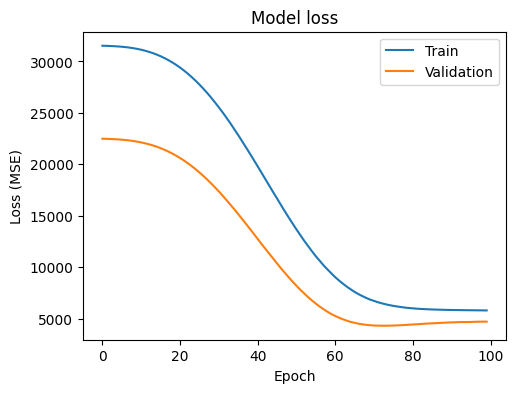

In [71]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))  # Taking square root of MSE for RMSE
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'Mean target value: {np.mean(target):.4f}')

# Plot the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Hyperparamter Tuning

Oft können Machine Learning Modelle durch so genanntes "Hyperparameter Tuning" verbessert werden.

In [19]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# Define a function to create the model with parameters that can be tuned
def create_nn_model(neurons=16, learning_rate=0.001):
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(2,)),
        Dense(neurons // 2, activation='relu'),
        Dense(1)
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    return model

# Create a tunable model
tunable_model = KerasRegressor(
    build_fn=create_nn_model,
    epochs=100,
    batch_size=16,
    verbose=0
)

# Define the parameters to tune
param_grid = {
    'neurons': [8, 16, 32],
    'learning_rate': [0.01, 0.001, 0.0001],
    'batch_size': [8, 16, 32],
    'epochs': [50, 100]
}

# Set up and run the grid search
grid = GridSearchCV(
    estimator=tunable_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1
)

# Fit the grid search
grid_result = grid.fit(X_train, y_train)

# Print results
print(f"Best score: {-grid_result.best_score_:.4f}")
print(f"Best parameters: {grid_result.best_params_}")

# Create and train a model with the best parameters
best_model = create_nn_model(
    neurons=grid_result.best_params_['neurons'],
    learning_rate=grid_result.best_params_['learning_rate']
)

best_model.fit(
    X_train, 
    y_train,
    epochs=grid_result.best_params_['epochs'],
    batch_size=grid_result.best_params_['batch_size'],
    verbose=1
)

# Evaluate the best model
y_pred = best_model.predict(X_test).flatten()
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
print(f'Best model RMSE: {rmse:.4f}')

Fitting 3 folds for each of 54 candidates, totalling 162 fits


C:\Users\tedle\AppData\Local\Temp\ipykernel_22828\1102707558.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  tunable_model = KerasRegressor(


Best score: 5210.3310
Best parameters: {'batch_size': 16, 'epochs': 50, 'learning_rate': 0.01, 'neurons': 32}
Epoch 1/50
23/23 [==============================] - 1s 5ms/step - loss: 28958.0625 - mae: 151.2313
Epoch 2/50
23/23 [==============================] - 1s 5ms/step - loss: 28958.0625 - mae: 151.2313
Epoch 2/50
23/23 [==============================] - 0s 5ms/step - loss: 22263.6426 - mae: 127.0139
Epoch 3/50
23/23 [==============================] - 0s 5ms/step - loss: 22263.6426 - mae: 127.0139
Epoch 3/50
23/23 [==============================] - 0s 5ms/step - loss: 8637.5664 - mae: 74.1475
Epoch 4/50
23/23 [==============================] - 0s 5ms/step - loss: 8637.5664 - mae: 74.1475
Epoch 4/50
23/23 [==============================] - 0s 5ms/step - loss: 5840.4873 - mae: 65.6833
Epoch 5/50
23/23 [==============================] - 0s 5ms/step - loss: 5765.2593 - mae: 63.5485
Epoch 6/50
23/23 [==============================] - 0s 5ms/step - loss: 5582.1670 - mae: 63.9848
Epoch 7/5

## Netzwerkarchitektur: Mehr Neuronen vs. Mehr Schichten

### Wann sollte man mehr Neuronen hinzufügen?

Mehr Neuronen in bestehenden Schichten zu verwenden ist sinnvoll, wenn:

- **Das Modell underfittet** (zu einfach für die Daten)
- **Mehr Kapazität für komplexe Muster** benötigt wird
- **Die Daten viele Features haben**, die parallel verarbeitet werden müssen
- **Das Problem linear separierbar** ist, aber mehr Repräsentationskraft braucht

### Wann sollte man mehr Schichten hinzufügen?

Mehr Schichten (tiefere Netzwerke) sind besser, wenn:

- **Hierarchische Merkmale** gelernt werden müssen
- **Komplexe, nichtlineare Beziehungen** existieren
- **Abstrakte Konzepte** aus einfacheren aufgebaut werden sollen
- **Sequentielle Verarbeitung** der Information nötig ist

### Praktisches Beispiel: MNIST Klassifikation

Wir vergleichen verschiedene Architekturen am MNIST-Dataset:

In [72]:
# Verschiedene Netzwerkarchitekturen vergleichen
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_openml

# Anzahl der Bilder, die wir verwenden wollen (für schnellere Tests)
n_bilder = 6000

# MNIST Daten laden - da die ursprünglichen Variablen durch Diabetes-Daten überschrieben wurden
# Wir laden die Daten auf die gleiche Weise wie im Clustering-Abschnitt
mnist = fetch_openml('mnist_784')
mnist_data = mnist.data.to_numpy()[:n_bilder]  # Nur die ersten n_bilder verwenden
mnist_labels = mnist.target.to_numpy()[:n_bilder]  # Entsprechende Labels

# Daten für Netzwerkvergleich aufteilen
X_train, X_test, y_train, y_test = train_test_split(mnist_data, mnist_labels, test_size=0.2, random_state=42)
y_train_onehot = to_categorical(y_train.astype('int'))
y_test_onehot = to_categorical(y_test.astype('int'))

def create_wide_network():
    """Breites Netzwerk: Wenige Schichten, viele Neuronen"""
    model = Sequential([
        Flatten(input_shape=(784,)),
        Dense(512, activation='relu'),  # Sehr breite Schicht
        Dropout(0.3),
        Dense(256, activation='relu'),  # Immer noch breit
        Dense(10, activation='softmax')
    ])
    return model

def create_deep_network():
    """Tiefes Netzwerk: Viele Schichten, weniger Neuronen pro Schicht"""
    model = Sequential([
        Flatten(input_shape=(784,)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

def create_balanced_network():
    """Ausgewogenes Netzwerk: Mittlere Tiefe und Breite"""
    model = Sequential([
        Flatten(input_shape=(784,)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Modelle erstellen und trainieren
models = {
    'Breit (Wenige Schichten, viele Neuronen)': create_wide_network(),
    'Tief (Viele Schichten, wenige Neuronen)': create_deep_network(),
    'Ausgewogen': create_balanced_network()
}

results = {}

for name, model in models.items():
    print(f"\n=== Training: {name} ===")
    
    # Modell kompilieren
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Parameter zählen
    total_params = model.count_params()
    print(f"Anzahl Parameter: {total_params:,}")
    
    # Training
    start_time = time.time()
    history = model.fit(
        X_train, y_train_onehot,
        epochs=10,
        batch_size=32,
        validation_data=(X_test, y_test_onehot),
        verbose=0
    )
    training_time = time.time() - start_time
    
    # Evaluation
    test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot, verbose=0)
    
    results[name] = {
        'model': model,
        'history': history,
        'test_accuracy': test_accuracy,
        'training_time': training_time,
        'total_params': total_params
    }
    
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Training Zeit: {training_time:.2f} Sekunden")


=== Training: Breit (Wenige Schichten, viele Neuronen) ===
Anzahl Parameter: 535,818
Test Accuracy: 0.9358
Training Zeit: 9.73 Sekunden

=== Training: Tief (Viele Schichten, wenige Neuronen) ===
Anzahl Parameter: 111,514
Test Accuracy: 0.8758
Training Zeit: 12.03 Sekunden

=== Training: Ausgewogen ===
Anzahl Parameter: 111,146
Test Accuracy: 0.8875
Training Zeit: 9.95 Sekunden


### Ergebnisse visualisieren

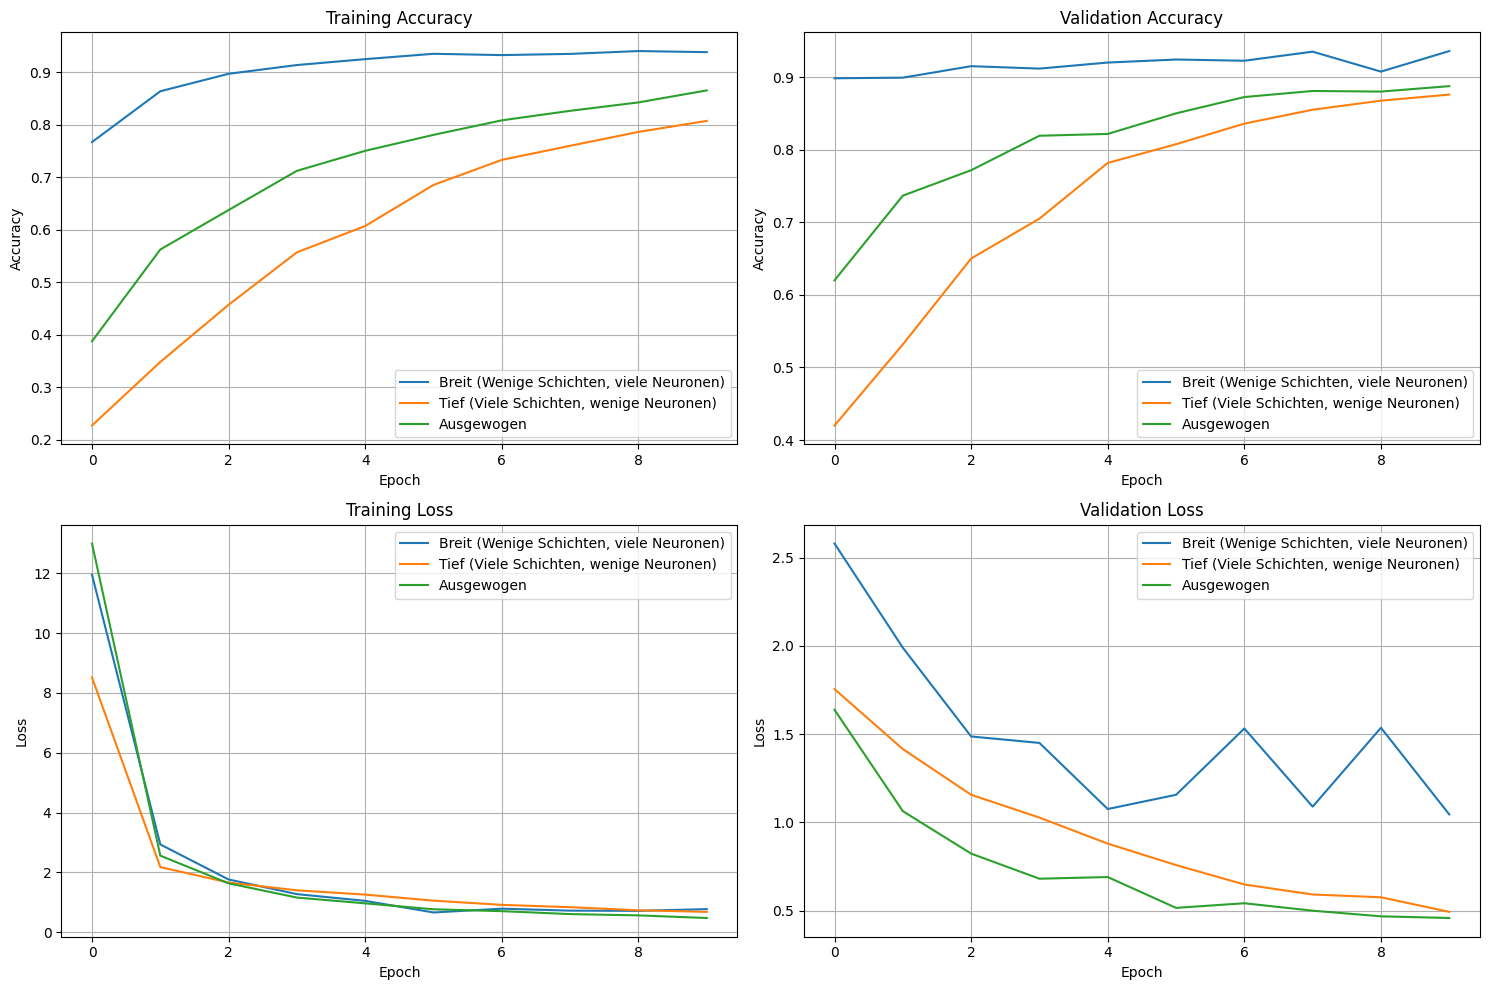


=== Vergleich der Architekturen ===
                             Architektur Test Accuracy Parameter Training Zeit (s)
Breit (Wenige Schichten, viele Neuronen)        0.9358   535,818              9.73
 Tief (Viele Schichten, wenige Neuronen)        0.8758   111,514             12.03
                              Ausgewogen        0.8875   111,146              9.95


In [73]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Training Accuracy
ax1 = axes[0, 0]
for name, result in results.items():
    ax1.plot(result['history'].history['accuracy'], label=name)
ax1.set_title('Training Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Validation Accuracy
ax2 = axes[0, 1]
for name, result in results.items():
    ax2.plot(result['history'].history['val_accuracy'], label=name)
ax2.set_title('Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

# Training Loss
ax3 = axes[1, 0]
for name, result in results.items():
    ax3.plot(result['history'].history['loss'], label=name)
ax3.set_title('Training Loss')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Loss')
ax3.legend()
ax3.grid(True)

# Validation Loss
ax4 = axes[1, 1]
for name, result in results.items():
    ax4.plot(result['history'].history['val_loss'], label=name)
ax4.set_title('Validation Loss')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Loss')
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show()

# Vergleichstabelle erstellen
import pandas as pd

comparison_data = []
for name, result in results.items():
    comparison_data.append({
        'Architektur': name,
        'Test Accuracy': f"{result['test_accuracy']:.4f}",
        'Parameter': f"{result['total_params']:,}",
        'Training Zeit (s)': f"{result['training_time']:.2f}"
    })

comparison_df = pd.DataFrame(comparison_data)
print("\n=== Vergleich der Architekturen ===")
print(comparison_df.to_string(index=False))

### Praktisches Beispiel: Regression mit verschiedenen Architekturen

Jetzt testen wir die verschiedenen Ansätze bei einem Regressionsproblem:

In [74]:
# Regression Beispiel mit verschiedenen Architekturen
from sklearn.datasets import make_regression

# Komplexeren Datensatz erstellen
X_reg, y_reg = make_regression(
    n_samples=1000, 
    n_features=20, 
    n_informative=15, 
    noise=0.1, 
    random_state=42
)

# Train-Test Split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

def create_wide_regressor():
    """Breites Netzwerk für Regression"""
    model = Sequential([
        Dense(256, activation='relu', input_shape=(20,)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    return model

def create_deep_regressor():
    """Tiefes Netzwerk für Regression"""
    model = Sequential([
        Dense(64, activation='relu', input_shape=(20,)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(8, activation='relu'),
        Dense(1)
    ])
    return model

def create_balanced_regressor():
    """Ausgewogenes Netzwerk für Regression"""
    model = Sequential([
        Dense(64, activation='relu', input_shape=(20,)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    return model

# Regressionsmodelle testen
reg_models = {
    'Breit': create_wide_regressor(),
    'Tief': create_deep_regressor(),
    'Ausgewogen': create_balanced_regressor()
}

reg_results = {}

for name, model in reg_models.items():
    print(f"\n=== Regression Training: {name} ===")
    
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )
    
    start_time = time.time()
    history = model.fit(
        X_train_reg, y_train_reg,
        epochs=50,
        batch_size=32,
        validation_data=(X_test_reg, y_test_reg),
        verbose=0
    )
    training_time = time.time() - start_time
    
    # Vorhersagen und Metriken
    y_pred = model.predict(X_test_reg, verbose=0).flatten()
    mse = mean_squared_error(y_test_reg, y_pred)
    mae = mean_absolute_error(y_test_reg, y_pred)
    
    reg_results[name] = {
        'history': history,
        'mse': mse,
        'mae': mae,
        'training_time': training_time,
        'total_params': model.count_params()
    }
    
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"Parameter: {model.count_params():,}")


=== Regression Training: Breit ===
MSE: 67.5751
MAE: 5.7738
Parameter: 38,401

=== Regression Training: Tief ===
MSE: 364.7564
MAE: 14.4371
Parameter: 4,097

=== Regression Training: Ausgewogen ===
MSE: 272.6113
MAE: 13.6911
Parameter: 3,969


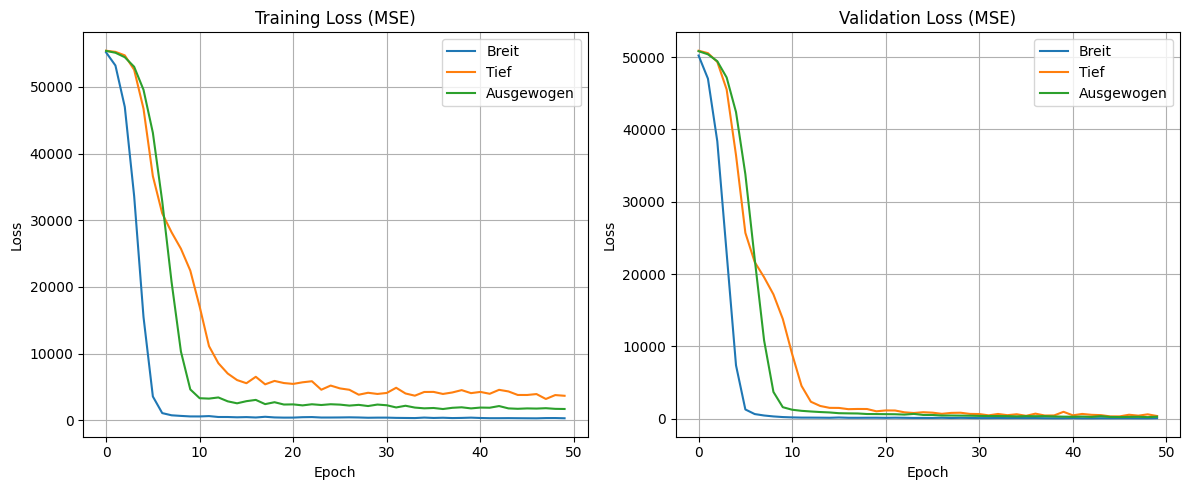

In [75]:
# Regression Ergebnisse visualisieren
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training Loss
ax1 = axes[0]
for name, result in reg_results.items():
    ax1.plot(result['history'].history['loss'], label=name)
ax1.set_title('Training Loss (MSE)')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# Validation Loss
ax2 = axes[1]
for name, result in reg_results.items():
    ax2.plot(result['history'].history['val_loss'], label=name)
ax2.set_title('Validation Loss (MSE)')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

### Entscheidungshilfen für die Netzwerkarchitektur

**Mehr Neuronen hinzufügen, wenn:**

1. **Underfitting auftritt**: Das Modell ist zu einfach für die Daten
2. **Viele Input-Features**: Mehr Neuronen können mehr Features parallel verarbeiten
3. **Begrenzte Trainingszeit**: Breitere Netzwerke trainieren oft schneller als tiefere
4. **Einfache Probleme**: Wenn keine hierarchischen Features nötig sind

**Mehr Schichten hinzufügen, wenn:**

1. **Komplexe Muster**: Hierarchische Merkmalsextraktion ist nötig
2. **Große Datensätze**: Tiefere Netzwerke können komplexere Repräsentationen lernen
3. **Overfitting bei breiten Netzwerken**: Tiefere Netzwerke haben oft bessere Regularisierung
4. **Sequentielle Verarbeitung**: Wenn Information schrittweise transformiert werden muss

### Praktische Faustregeln

In [76]:
# Beispiel-Entscheidungsbaum für Architektur-Wahl

def suggest_architecture(n_features, n_samples, problem_complexity):
    """
    Schlägt eine Netzwerkarchitektur vor basierend auf Problemcharakteristika
    
    Args:
        n_features: Anzahl Input-Features
        n_samples: Anzahl Trainingssamples
        problem_complexity: 'low', 'medium', 'high'
    """
    
    if problem_complexity == 'low':
        if n_features > 100:
            return "Breites Netzwerk: [n_features*2, n_features, output]"
        else:
            return "Einfaches Netzwerk: [64, 32, output]"
    
    elif problem_complexity == 'medium':
        if n_samples > 10000:
            return "Ausgewogenes Netzwerk: [128, 64, 32, output]"
        else:
            return "Mittleres Netzwerk: [64, 32, output]"
    
    else:  # high complexity
        if n_samples > 50000:
            return "Tiefes Netzwerk: [128, 64, 32, 16, 8, output]"
        else:
            return "Vorsichtig tiefes Netzwerk: [64, 32, 16, output]"

# Beispiele
print("Architektur-Empfehlungen:")
print(f"MNIST (784 Features, 60k Samples, medium): {suggest_architecture(784, 60000, 'medium')}")
print(f"Iris (4 Features, 150 Samples, low): {suggest_architecture(4, 150, 'low')}")
print(f"ImageNet (224*224*3 Features, 1M+ Samples, high): {suggest_architecture(150528, 1000000, 'high')}")

Architektur-Empfehlungen:
MNIST (784 Features, 60k Samples, medium): Ausgewogenes Netzwerk: [128, 64, 32, output]
Iris (4 Features, 150 Samples, low): Einfaches Netzwerk: [64, 32, output]
ImageNet (224*224*3 Features, 1M+ Samples, high): Tiefes Netzwerk: [128, 64, 32, 16, 8, output]


### Zusammenfassung

- **Breite Netzwerke** (mehr Neuronen): Gut für parallele Verarbeitung vieler Features
- **Tiefe Netzwerke** (mehr Schichten): Besser für hierarchische Merkmalsextraktion
- **Ausgewogene Ansätze** funktionieren oft am besten für mittlere Probleme
- **Experimentieren** ist wichtig - die optimale Architektur hängt vom spezifischen Problem ab

Die Wahl zwischen mehr Neuronen und mehr Schichten sollte immer durch Experimente und Validierung auf Ihren spezifischen Daten getroffen werden.

## Clustering mit neuronalen Netzwerken

Bisher haben wir uns mit überwachten Lernansätzen beschäftigt, bei denen wir Modelle mit gelabelten Daten trainiert haben. Jetzt wenden wir uns dem unüberwachten Lernen zu, insbesondere dem Clustering mit Hilfe von neuronalen Netzwerken.

### Autoencoder für Dimensionsreduktion

Autoencoder sind neuronale Netzwerke, die darauf trainiert werden, ihre Eingabe zu reproduzieren. Sie bestehen aus zwei Teilen:
- Einem **Encoder**, der die Eingabedaten in eine komprimierte Darstellung (latenten Raum) umwandelt
- Einem **Decoder**, der versucht, aus dieser komprimierten Darstellung die ursprünglichen Daten zu rekonstruieren

Die komprimierte Darstellung im latenten Raum kann für Clustering verwendet werden, da sie wichtige Merkmale der Daten beibehält.

In [78]:
# Autoencoder für MNIST implementieren
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# WICHTIG: Wir müssen die MNIST-Daten neu laden, da full_data mit dem Diabetes-Datensatz überschrieben wurde
mnist = fetch_openml('mnist_784')
mnist_data = mnist.data.to_numpy()[:n_bilder]  # Nur die ersten n_bilder verwenden
mnist_labels = mnist.target.to_numpy()[:n_bilder]  # Entsprechende Labels

print(f"Form der MNIST-Daten: {mnist_data.shape}")

# Normalisieren der Daten (falls noch nicht geschehen)
X = mnist_data / 255.0

# Definieren der Autoencoder-Architektur
input_img = Input(shape=(784,))  # Eingabe: 784 Pixel (28x28)
# Encoder
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
latent_space = Dense(2, activation='linear', name='latent_space')(encoded)  # 2D latent space for visualization
# Decoder
decoded = Dense(64, activation='relu')(latent_space)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)  # Ausgabe: 784 Pixel

# Modelle erstellen
autoencoder = Model(input_img, decoded)  # Vollständiger Autoencoder
encoder = Model(input_img, latent_space)  # Nur der Encoder-Teil

# Autoencoder kompilieren
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Form der MNIST-Daten: (6000, 784)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_603 (Dense)           (None, 128)               100480    
                                                                 
 dense_604 (Dense)           (None, 64)                8256      
                                                                 
 latent_space (Dense)        (None, 2)                 130       
                                                                 
 dense_605 (Dense)           (None, 64)                192       
                                                                 
 dense_606 (Dense)           (None, 128)               8320      
                                                                 
 dense_607 (Dense)       

Epoch 1/20
19/19 [==============================] - 2s 29ms/step - loss: 0.6037 - val_loss: 0.3712
Epoch 2/20
19/19 [==============================] - 0s 12ms/step - loss: 0.3093 - val_loss: 0.2858
Epoch 3/20
19/19 [==============================] - 0s 11ms/step - loss: 0.2732 - val_loss: 0.2732
Epoch 4/20
19/19 [==============================] - 0s 11ms/step - loss: 0.2645 - val_loss: 0.2673
Epoch 5/20
19/19 [==============================] - 0s 11ms/step - loss: 0.2589 - val_loss: 0.2611
Epoch 6/20
19/19 [==============================] - 0s 11ms/step - loss: 0.2510 - val_loss: 0.2521
Epoch 7/20
19/19 [==============================] - 0s 10ms/step - loss: 0.2443 - val_loss: 0.2472
Epoch 8/20
19/19 [==============================] - 0s 10ms/step - loss: 0.2401 - val_loss: 0.2429
Epoch 9/20
19/19 [==============================] - 0s 10ms/step - loss: 0.2359 - val_loss: 0.2383
Epoch 10/20
19/19 [==============================] - 0s 10ms/step - loss: 0.2319 - val_loss: 0.2349
Epoch 11/

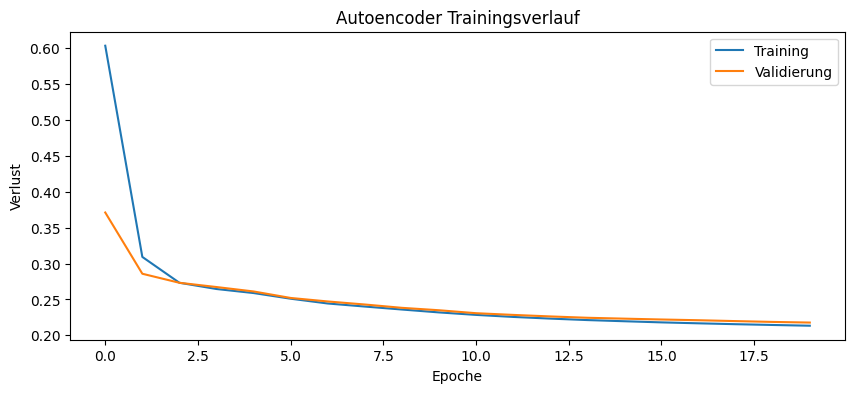

In [79]:
# Autoencoder trainieren
history = autoencoder.fit(
    X, X,  # Eingabe = Ausgabe (unüberwachtes Lernen)
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_split=0.2,
    verbose=1
)

# Verlauf des Trainings anzeigen
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Autoencoder Trainingsverlauf')
plt.ylabel('Verlust')
plt.xlabel('Epoche')
plt.legend(['Training', 'Validierung'], loc='upper right')
plt.show()

188/188 [==============================] - 0s 2ms/step


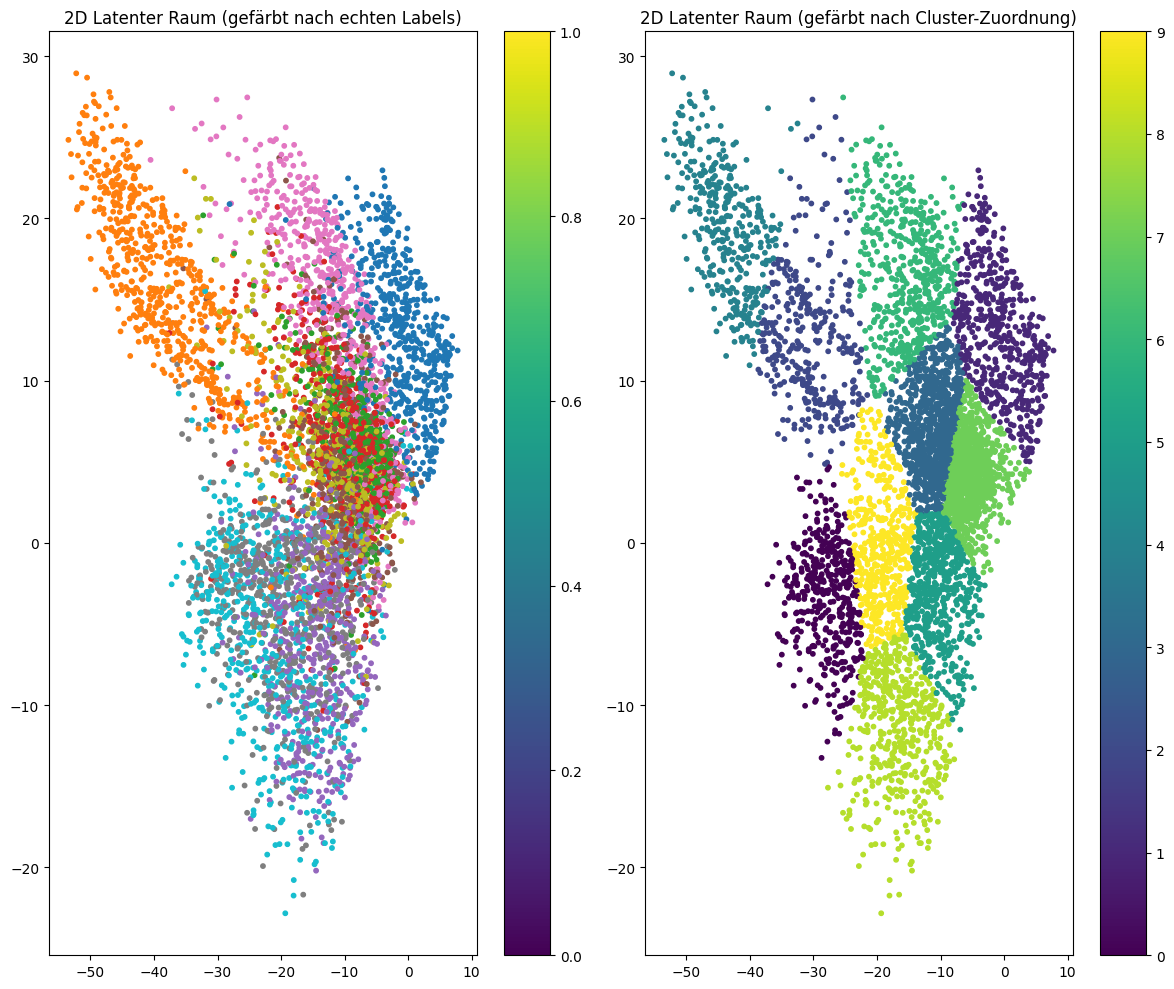

Adjusted Rand Index: 0.2445
Ein Wert nahe 1 bedeutet hohe Übereinstimmung zwischen Clustern und echten Labels.


In [80]:
# Bilder in den latenten Raum kodieren
encoded_imgs = encoder.predict(X)

# K-Means Clustering auf den kodierten Daten
n_clusters = 10  # Wir wissen, dass es 10 Ziffern gibt
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(encoded_imgs)

# Visualisierung der kodierten Bilder im 2D-Raum mit Clustern
plt.figure(figsize=(12, 10))

# Farbzuordnung basierend auf den echten Labels
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
label_colors = [colors[int(label)] for label in mnist_labels]  # Verwenden wir die neu geladenen Labels

# Latenten Raum visualisieren, gefärbt nach echten Labels
plt.subplot(1, 2, 1)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=label_colors, s=10)
plt.title('2D Latenter Raum (gefärbt nach echten Labels)')
plt.colorbar()

# Latenten Raum visualisieren, gefärbt nach Cluster-Zuordnung
plt.subplot(1, 2, 2)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=clusters, s=10, cmap='viridis')
plt.title('2D Latenter Raum (gefärbt nach Cluster-Zuordnung)')
plt.colorbar()

plt.tight_layout()
plt.show()

# Evaluierung der Clustering-Ergebnisse
# Vergleichen der gefundenen Cluster mit den tatsächlichen Labels
labels_int = mnist_labels.astype(int)  # Verwenden wir die neu geladenen Labels
rand_index = adjusted_rand_score(labels_int, clusters)
print(f"Adjusted Rand Index: {rand_index:.4f}")
print("Ein Wert nahe 1 bedeutet hohe Übereinstimmung zwischen Clustern und echten Labels.")

1/1 [==============================] - 0s 130ms/step


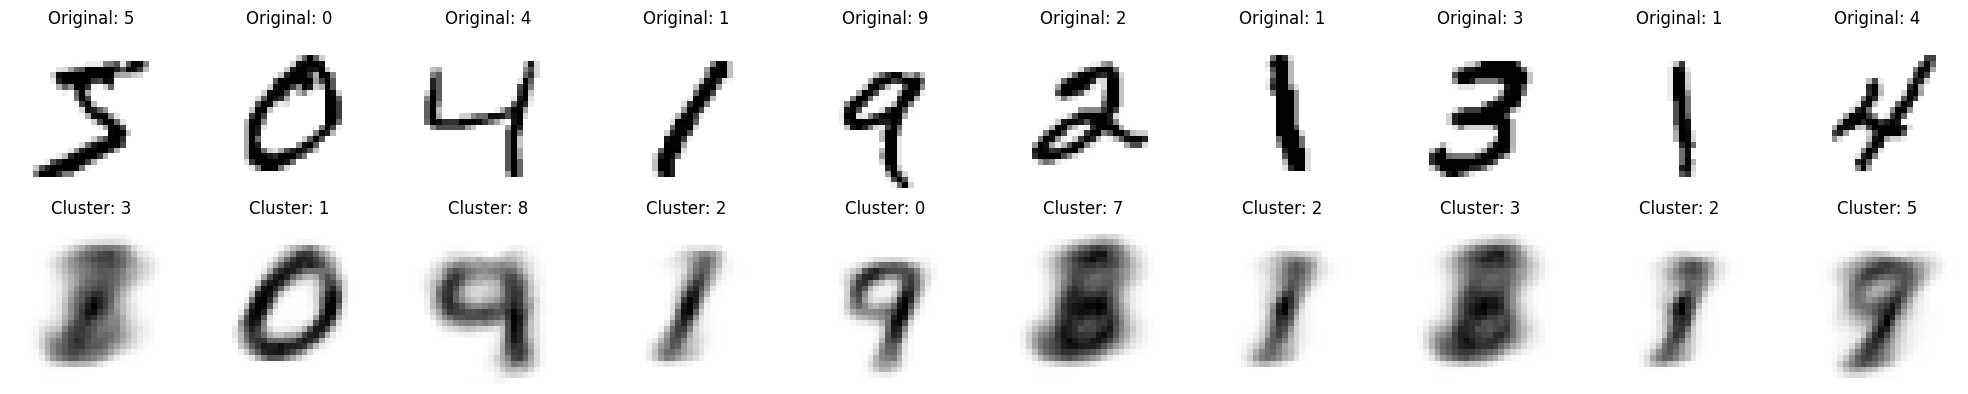

In [81]:
# Rekonstruierte Bilder anzeigen
decoded_imgs = autoencoder.predict(X[:10])

plt.figure(figsize=(20, 4))
for i in range(10):
    # Original anzeigen
    ax = plt.subplot(2, 10, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray_r')
    plt.title(f"Original: {mnist_labels[i]}")  # Verwenden wir die neu geladenen Labels
    plt.axis('off')
    
    # Rekonstruktion anzeigen
    ax = plt.subplot(2, 10, i+11)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray_r')
    plt.title(f"Cluster: {clusters[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### Interpretation der Ergebnisse

Der Autoencoder hat die MNIST-Bilder auf einen zweidimensionalen latenten Raum reduziert. Im idealen Fall würden die Bilder der gleichen Ziffer nahe beieinander im latenten Raum liegen, was zu gut definierten Clustern führen würde.

Die Visualisierung zeigt, wie gut der Autoencoder die zugrunde liegende Struktur der Daten erfasst hat. Der Adjusted Rand Index misst die Ähnlichkeit zwischen den gefundenen Clustern und den tatsächlichen Labels - ein höherer Wert bedeutet eine bessere Übereinstimmung.

Dies ist ein Beispiel für unüberwachtes Lernen, da wir für das Training des Autoencoders keine Labels verwendet haben. Die Cluster wurden ausschließlich auf Basis der Ähnlichkeiten in den Bildern gefunden.

### Unterschiede zu klassischen Clustering-Verfahren

Im Gegensatz zu klassischen Clustering-Methoden wie K-Means, hierarchischem Clustering oder DBSCAN hat der neuronale Netzwerk-Ansatz folgende Vorteile:

1. **Nichtlineare Dimensionsreduktion**: Der Autoencoder kann komplexe, nichtlineare Beziehungen in den Daten erfassen
2. **Flexibilität**: Die Architektur kann an die Komplexität der Daten angepasst werden
3. **Feature Learning**: Der Autoencoder lernt automatisch relevante Features aus den Rohdaten

Diese Methode ist besonders nützlich für komplexe, hochdimensionale Daten wie Bilder, wo herkömmliche Clustering-Algorithmen oft an ihre Grenzen stoßen.

## Clustering mit dem Iris-Dataset (Neural Network Ansatz)

Wir konzentrieren uns auf einen modernen Ansatz für Clustering mit neuronalen Netzwerken, indem wir einen Autoencoder verwenden, um die Daten in einen niedrigdimensionalen Raum zu projizieren und dort zu clustern.

In [82]:
# Iris-Dataset laden und erkunden
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

iris_df = pd.DataFrame(X_iris, columns=feature_names)
iris_df['species'] = [target_names[i] for i in y_iris]

print("Iris Dataset Information:")
print(f"Shape: {X_iris.shape}")
print(f"Features: {feature_names}")
print(f"Species: {target_names}")
print("\nErste 5 Zeilen:")
print(iris_df.head())

print("\nStatistische Zusammenfassung:")
print(iris_df.describe())

Iris Dataset Information:
Shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Species: ['setosa' 'versicolor' 'virginica']

Erste 5 Zeilen:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Statistische Zusammenfassung:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066      

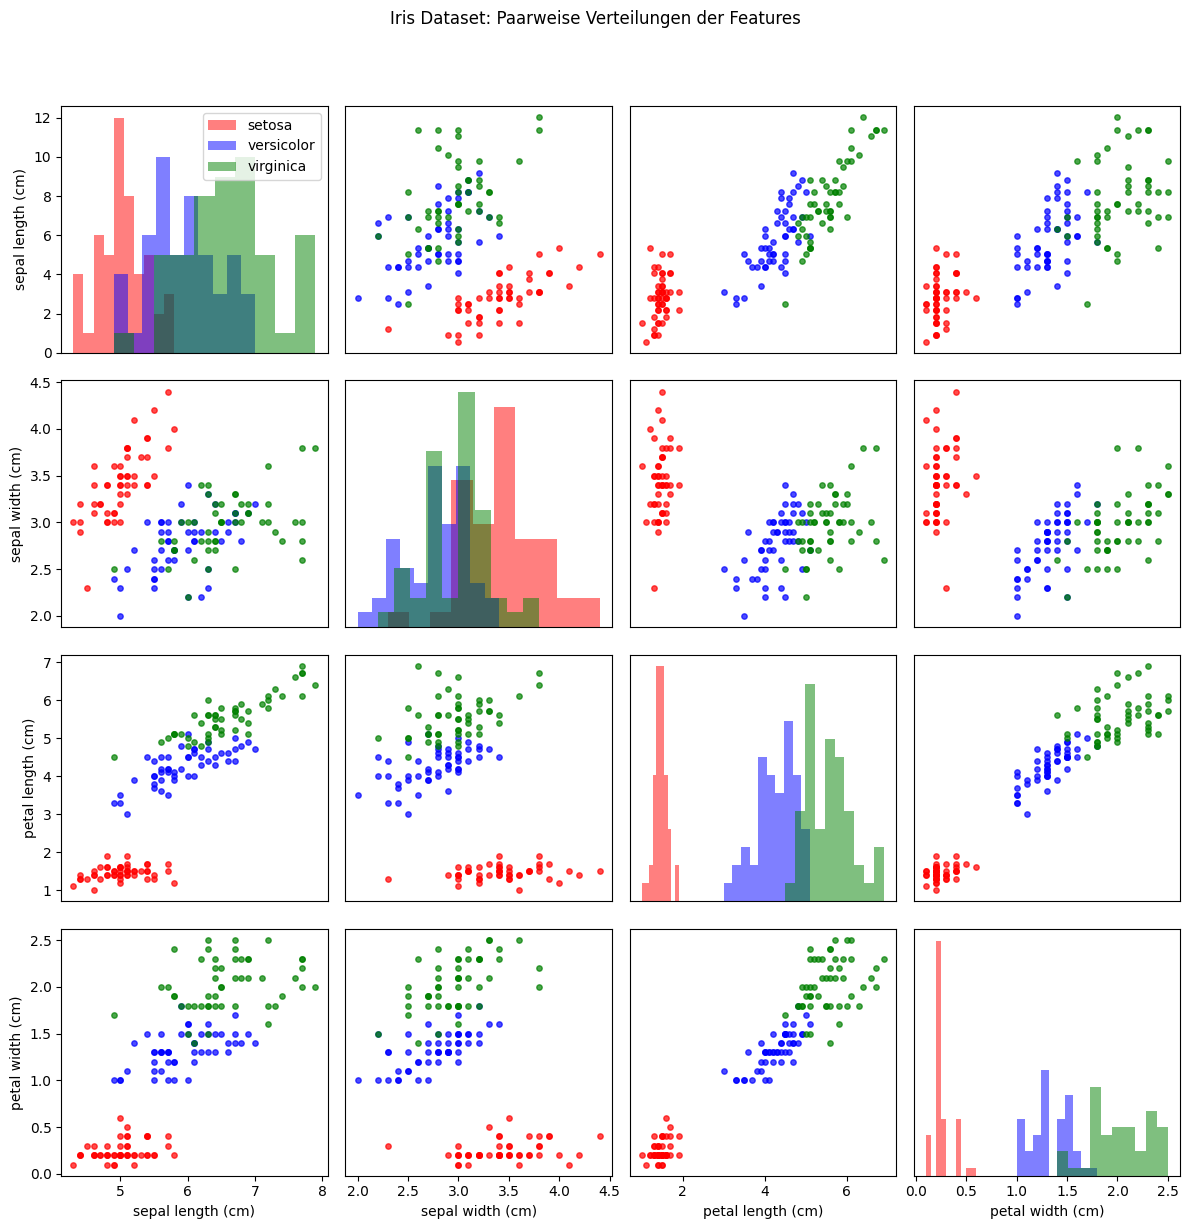

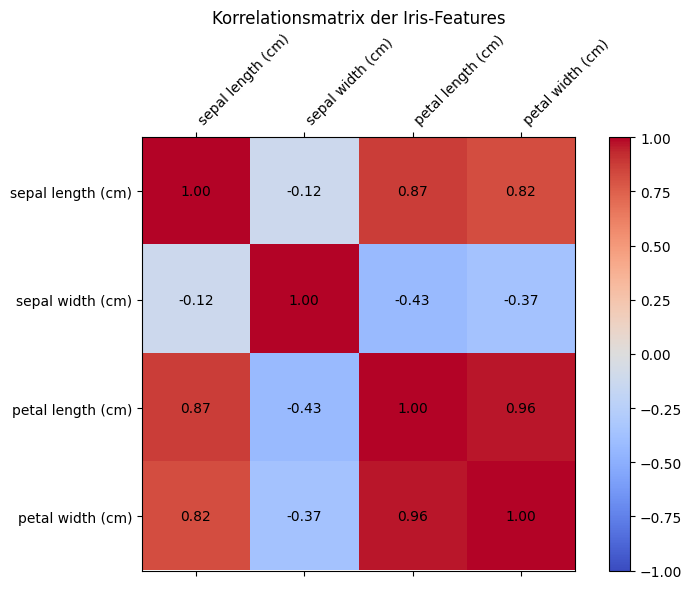

In [83]:
# Visualisierung des Iris-Datasets mit Matplotlib
plt.style.use('default')
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
species = iris_df['species'].unique()
colors = ['red', 'blue', 'green']
color_dict = dict(zip(species, colors))
for i in range(4):
    for j in range(4):
        ax = axes[i, j]
        if i == j:
            for s in species:
                ax.hist(
                    iris_df[iris_df['species'] == s].iloc[:, i],
                    color=color_dict[s],
                    alpha=0.5,
                    label=s
                )
            if i == 0:
                ax.legend()
        else:
            for s in species:
                ax.scatter(
                    iris_df[iris_df['species'] == s].iloc[:, j],
                    iris_df[iris_df['species'] == s].iloc[:, i],
                    color=color_dict[s],
                    alpha=0.7,
                    s=15
                )
        if i == 3:
            ax.set_xlabel(feature_names[j])
        else:
            ax.set_xticks([])
        if j == 0:
            ax.set_ylabel(feature_names[i])
        else:
            ax.set_yticks([])
plt.suptitle('Iris Dataset: Paarweise Verteilungen der Features', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

correlation_matrix = iris_df.iloc[:, :-1].corr()
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set_xticks(range(len(feature_names)))
ax.set_yticks(range(len(feature_names)))
ax.set_xticklabels(feature_names, rotation=45, ha='left')
ax.set_yticklabels(feature_names)
for (i, j), val in np.ndenumerate(correlation_matrix.values):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')
plt.title('Korrelationsmatrix der Iris-Features')
plt.tight_layout()
plt.show()

In [84]:
# Autoencoder-basiertes Clustering für Iris
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_iris)

input_layer = Input(shape=(4,))
encoded = Dense(8, activation='relu')(input_layer)
encoded = Dense(3, activation='relu', name='encoded')(encoded)  # 3D latenter Raum
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(4, activation='linear')(decoded)

autoencoder_iris = Model(input_layer, decoded)
encoder_iris = Model(input_layer, encoded)
autoencoder_iris.compile(optimizer='adam', loss='mse')
autoencoder_iris.fit(
    X_scaled, X_scaled,
    epochs=50,
    batch_size=16,
    verbose=0
)
X_encoded = encoder_iris.predict(X_scaled)
kmeans_ae = KMeans(n_clusters=3, random_state=42)
clusters_ae = kmeans_ae.fit_predict(X_encoded)
ari_ae = adjusted_rand_score(y_iris, clusters_ae)
silhouette_ae = silhouette_score(X_encoded, clusters_ae)
print("Autoencoder + K-Means Clustering:")
print(f"Adjusted Rand Index: {ari_ae:.4f}")
print(f"Silhouette Score: {silhouette_ae:.4f}")

5/5 [==============================] - 0s 2ms/step
Autoencoder + K-Means Clustering:
Adjusted Rand Index: 0.7126
Silhouette Score: 0.5080


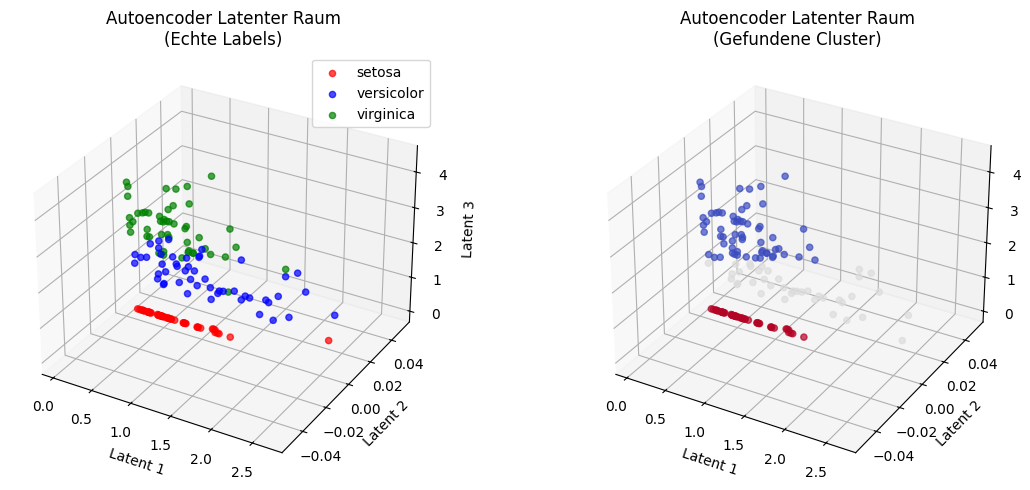

In [85]:
# Visualisierung der Ergebnisse
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(12, 5))
# 3D Visualisierung des latenten Raums vom Autoencoder (echte Labels)
ax1 = plt.subplot(1, 2, 1, projection='3d')
for i, species in enumerate(target_names):
    mask = y_iris == i
    ax1.scatter(X_encoded[mask, 0], X_encoded[mask, 1], X_encoded[mask, 2], 
                c=colors[i], label=species, alpha=0.7)
ax1.set_title('Autoencoder Latenter Raum\n(Echte Labels)')
ax1.set_xlabel('Latent 1')
ax1.set_ylabel('Latent 2')
ax1.set_zlabel('Latent 3')
ax1.legend()
# 3D Visualisierung des latenten Raums (Cluster-Zuordnung)
ax2 = plt.subplot(1, 2, 2, projection='3d')
ax2.scatter(X_encoded[:, 0], X_encoded[:, 1], X_encoded[:, 2], 
            c=clusters_ae, cmap='coolwarm', alpha=0.7)
ax2.set_title('Autoencoder Latenter Raum\n(Gefundene Cluster)')
ax2.set_xlabel('Latent 1')
ax2.set_ylabel('Latent 2')
ax2.set_zlabel('Latent 3')
plt.tight_layout()
plt.show()

### Fazit: Clustering mit neuronalen Netzwerken

Der Autoencoder-Ansatz ermöglicht es, komplexe, nichtlineare Zusammenhänge in den Daten zu erfassen und die Daten in einen niedrigdimensionalen Raum zu projizieren. Das anschließende Clustering (z.B. mit K-Means) im latenten Raum kann die Trennung der Klassen verbessern, insbesondere bei komplexeren oder hochdimensionalen Datensätzen.

**Vorteile:**
- Kann nichtlineare Beziehungen lernen und relevante Features automatisch extrahieren
- Flexibel an verschiedene Datentypen und -dimensionen anpassbar
- Besonders nützlich bei komplexen, hochdimensionalen Daten

**Limitationen:**
- Komplexer als klassische Methoden, benötigt mehr Rechenzeit und Daten
- Kann bei sehr kleinen Datensätzen zu Overfitting neigen

Für das Iris-Dataset, das relativ einfach und niedrigdimensional ist, zeigt der Autoencoder bereits eine gute Trennung der Klassen im latenten Raum. Bei schwierigeren Aufgaben und größeren Datensätzen spielt dieser Ansatz seine Stärken noch deutlicher aus.

## Verstärkendes Lernen mit neuronalen Netzwerken

Nachdem wir überwachtes und unüberwachtes Lernen kennengelernt haben, widmen wir uns nun einer dritten wichtigen Kategorie des maschinellen Lernens: dem **verstärkenden Lernen** (Reinforcement Learning).

### Was ist verstärkendes Lernen?

Verstärkendes Lernen unterscheidet sich grundlegend von den bisherigen Ansätzen:

- **Überwachtes Lernen**: Lernt von gelabelten Beispielen
- **Unüberwachtes Lernen**: Findet Muster in ungelabelten Daten
- **Verstärkendes Lernen**: Lernt durch Interaktion mit einer Umgebung und erhält Belohnungen oder Strafen

Das Ziel ist es, eine **Policy** (Strategie) zu lernen, die die kumulierte Belohnung maximiert.

### Deep Q-Networks (DQN) für Atari-Spiele

Eine der bekanntesten Anwendungen von Deep Reinforcement Learning sind **Deep Q-Networks (DQN)**, die von DeepMind entwickelt wurden, um Atari-Spiele auf menschlichem Niveau zu spielen.

**Grundkonzepte:**
- **Agent**: Das neuronale Netzwerk, das Entscheidungen trifft
- **Environment**: Das Spiel (z.B. Pong, Breakout)
- **State**: Der aktuelle Spielzustand (Bildschirminhalt)
- **Action**: Mögliche Aktionen (z.B. links, rechts, feuern)
- **Reward**: Belohnung für eine Aktion (z.B. Punkte, Spielende)
- **Q-Value**: Erwarteter zukünftiger Nutzen einer Aktion in einem bestimmten Zustand

In [86]:
### Installation und Imports für Reinforcement Learning

# Für verstärkendes Lernen benötigen wir zusätzliche Bibliotheken. Die wichtigste ist **OpenAI Gym**, eine Sammlung von Umgebungen für Reinforcement Learning.

# Diese Bibliotheken installieren (falls noch nicht vorhanden):
# ```bash
# pip install gymnasium[atari]
# pip install gymnasium[accept-rom-license]
# pip install ale-py
# ```

# Nun die Bibliotheken importieren:
# ```python
import gymnasium as gym
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from collections import deque
import random
from PIL import Image
import cv2

print("Reinforcement Learning Bibliotheken erfolgreich importiert!")
print(f"Gymnasium Version: {gym.__version__}")
print(f"TensorFlow Version: {tf.__version__}")


Reinforcement Learning Bibliotheken erfolgreich importiert!
Gymnasium Version: 1.1.1
TensorFlow Version: 2.10.1


In [87]:
# DQN Netzwerk-Architektur implementieren

class DQNNetwork:
    def __init__(self, input_shape, n_actions, learning_rate=0.00025):
        self.input_shape = input_shape
        self.n_actions = n_actions
        self.learning_rate = learning_rate
        
        # Hauptnetzwerk erstellen
        self.q_network = self._build_network()
        # Zielnetzwerk erstellen (für stabiles Training)
        self.target_network = self._build_network()
        
        # Zielnetzwerk mit Hauptnetzwerk initialisieren
        self.update_target_network()
    
    def _build_network(self):
        """Erstellt das DQN Netzwerk"""
        model = keras.Sequential([
            # Convolutional Layers für Bildverarbeitung
            layers.Conv2D(32, 8, strides=4, activation='relu', input_shape=self.input_shape),
            layers.Conv2D(64, 4, strides=2, activation='relu'),
            layers.Conv2D(64, 3, strides=1, activation='relu'),
            
            # Flatten für Dense Layers
            layers.Flatten(),
            
            # Dense Layers
            layers.Dense(512, activation='relu'),
            layers.Dense(self.n_actions, activation='linear')  # Q-Werte für alle Aktionen
        ])
        
        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=self.learning_rate),
            loss='mse'
        )
        
        return model
    
    def update_target_network(self):
        """Kopiert Gewichte vom Hauptnetzwerk zum Zielnetzwerk"""
        self.target_network.set_weights(self.q_network.get_weights())
    
    def predict(self, state):
        """Vorhersage der Q-Werte für einen Zustand"""
        return self.q_network.predict(state, verbose=0)
    
    def predict_target(self, state):
        """Vorhersage der Q-Werte mit dem Zielnetzwerk"""
        return self.target_network.predict(state, verbose=0)
    
    def train(self, states, targets):
        """Trainiert das Hauptnetzwerk"""
        return self.q_network.fit(states, targets, verbose=0)

print("DQN Netzwerk-Klasse erfolgreich definiert!")

DQN Netzwerk-Klasse erfolgreich definiert!


In [88]:
# Experience Replay Buffer implementieren

class ReplayBuffer:
    def __init__(self, max_size=100000):
        self.buffer = deque(maxlen=max_size)
    
    def add(self, state, action, reward, next_state, done):
        """Fügt eine Erfahrung zum Buffer hinzu"""
        experience = (state, action, reward, next_state, done)
        self.buffer.append(experience)
    
    def sample(self, batch_size):
        """Zufällige Stichprobe von Erfahrungen"""
        batch = random.sample(self.buffer, batch_size)
        
        states = np.array([e[0] for e in batch])
        actions = np.array([e[1] for e in batch])
        rewards = np.array([e[2] for e in batch])
        next_states = np.array([e[3] for e in batch])
        dones = np.array([e[4] for e in batch])
        
        return states, actions, rewards, next_states, dones
    
    def size(self):
        return len(self.buffer)

print("Experience Replay Buffer erfolgreich definiert!")

Experience Replay Buffer erfolgreich definiert!


In [89]:
# Umgebungsvorverarbeitung für Atari-Spiele

def preprocess_frame(frame):
    """Vorverarbeitung eines Atari-Frames"""
    # Zu Graustufen konvertieren
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    # Auf 84x84 skalieren
    resized = cv2.resize(gray, (84, 84))
    # Normalisieren (0-1)
    normalized = resized / 255.0
    return normalized

def stack_frames(frames, new_frame, is_new_episode):
    """Stapelt 4 aufeinanderfolgende Frames für Bewegungsinformation"""
    frame = preprocess_frame(new_frame)
    
    if is_new_episode:
        # Bei neuer Episode: gleichen Frame 4x stapeln
        frames = np.stack([frame for _ in range(4)], axis=2)
    else:
        # Neuen Frame hinzufügen, ältesten entfernen
        frames = frames[:, :, 1:]
        frame = np.expand_dims(frame, axis=2)
        frames = np.concatenate([frames, frame], axis=2)
    
    return frames

print("Vorverarbeitungsfunktionen erfolgreich definiert!")

Vorverarbeitungsfunktionen erfolgreich definiert!


In [90]:
# DQN Agent implementieren

class DQNAgent:
    def __init__(self, input_shape, n_actions, learning_rate=0.00025):
        self.input_shape = input_shape
        self.n_actions = n_actions
        self.memory = ReplayBuffer(max_size=100000)
        self.dqn = DQNNetwork(input_shape, n_actions, learning_rate)
        
        # Hyperparameter
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.batch_size = 32
        self.gamma = 0.95  # Discount factor
        self.update_target_freq = 1000  # Zielnetzwerk Update-Frequenz
        self.train_freq = 4  # Training-Frequenz
        
        self.step_count = 0
    
    def act(self, state, training=True):
        """Wählt eine Aktion basierend auf epsilon-greedy Strategie"""
        if training and np.random.random() <= self.epsilon:
            # Zufällige Aktion (Exploration)
            return np.random.randint(0, self.n_actions)
        else:
            # Beste Aktion basierend auf Q-Werten (Exploitation)
            state_input = np.expand_dims(state, axis=0)
            q_values = self.dqn.predict(state_input)
            return np.argmax(q_values[0])
    
    def remember(self, state, action, reward, next_state, done):
        """Speichert Erfahrung im Replay Buffer"""
        self.memory.add(state, action, reward, next_state, done)
    
    def replay(self):
        """Trainiert das Netzwerk mit einem Batch aus dem Replay Buffer"""
        if self.memory.size() < self.batch_size:
            return
        
        # Batch aus Replay Buffer sampeln
        states, actions, rewards, next_states, dones = self.memory.sample(self.batch_size)
        
        # Q-Werte für aktuelle Zustände
        current_q_values = self.dqn.predict(states)
        
        # Q-Werte für nächste Zustände (mit Zielnetzwerk)
        next_q_values = self.dqn.predict_target(next_states)
        
        # Q-Learning Update
        targets = current_q_values.copy()
        for i in range(self.batch_size):
            if dones[i]:
                targets[i][actions[i]] = rewards[i]
            else:
                targets[i][actions[i]] = rewards[i] + self.gamma * np.max(next_q_values[i])
        
        # Netzwerk trainieren
        self.dqn.train(states, targets)
        
        # Epsilon reduzieren
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        
        self.step_count += 1
        
        # Zielnetzwerk aktualisieren
        if self.step_count % self.update_target_freq == 0:
            self.dqn.update_target_network()

print("DQN Agent erfolgreich implementiert!")

DQN Agent erfolgreich implementiert!


In [91]:
# Vereinfachtes Training (für Demo-Zwecke)
# In der Praxis würde das Training mehrere Stunden/Tage dauern

def train_dqn_demo():
    """Vereinfachte DQN Training Demo"""
    print("=== DQN Training Demo ===")
    print("Hinweis: Dies ist eine vereinfachte Demo.")
    print("Echtes DQN Training dauert mehrere Stunden auf echten Atari-Spielen.")
    
    # Erstelle eine vereinfachte Umgebung
    # (In der Praxis: env = gym.make('ALE/Breakout-v5'))
    
    # Simuliere Training-Parameter
    input_shape = (84, 84, 4)  # 84x84 Pixel, 4 gestapelte Frames
    n_actions = 4  # Beispiel: Links, Rechts, Nichts tun, Feuer
    
    agent = DQNAgent(input_shape, n_actions)
    
    # Simuliere Training-Ergebnisse
    episodes = 100
    scores = []
    epsilon_values = []
    
    print(f"\nSimuliere {episodes} Trainings-Episoden...")
    
    for episode in range(episodes):
        # Simuliere Episode-Score (in der Realität vom Spiel)
        # Frühe Episoden: schlechte Performance, später: Verbesserung
        base_score = max(0, (episode - 20) * 2 + np.random.normal(0, 10))
        score = max(0, base_score + np.random.normal(0, 5))
        scores.append(score)
        
        # Epsilon-Werte verfolgen
        epsilon_values.append(agent.epsilon)
        
        # Epsilon reduzieren (simuliert)
        if agent.epsilon > agent.epsilon_min:
            agent.epsilon *= agent.epsilon_decay
        
        if episode % 20 == 0:
            print(f"Episode {episode}: Score = {score:.1f}, Epsilon = {agent.epsilon:.3f}")
    
    return scores, epsilon_values

# Training ausführen
scores, epsilon_values = train_dqn_demo()

=== DQN Training Demo ===
Hinweis: Dies ist eine vereinfachte Demo.
Echtes DQN Training dauert mehrere Stunden auf echten Atari-Spielen.

Simuliere 100 Trainings-Episoden...
Episode 0: Score = 0.0, Epsilon = 0.995
Episode 20: Score = 1.7, Epsilon = 0.900
Episode 40: Score = 28.7, Epsilon = 0.814
Episode 60: Score = 78.8, Epsilon = 0.737
Episode 80: Score = 121.8, Epsilon = 0.666


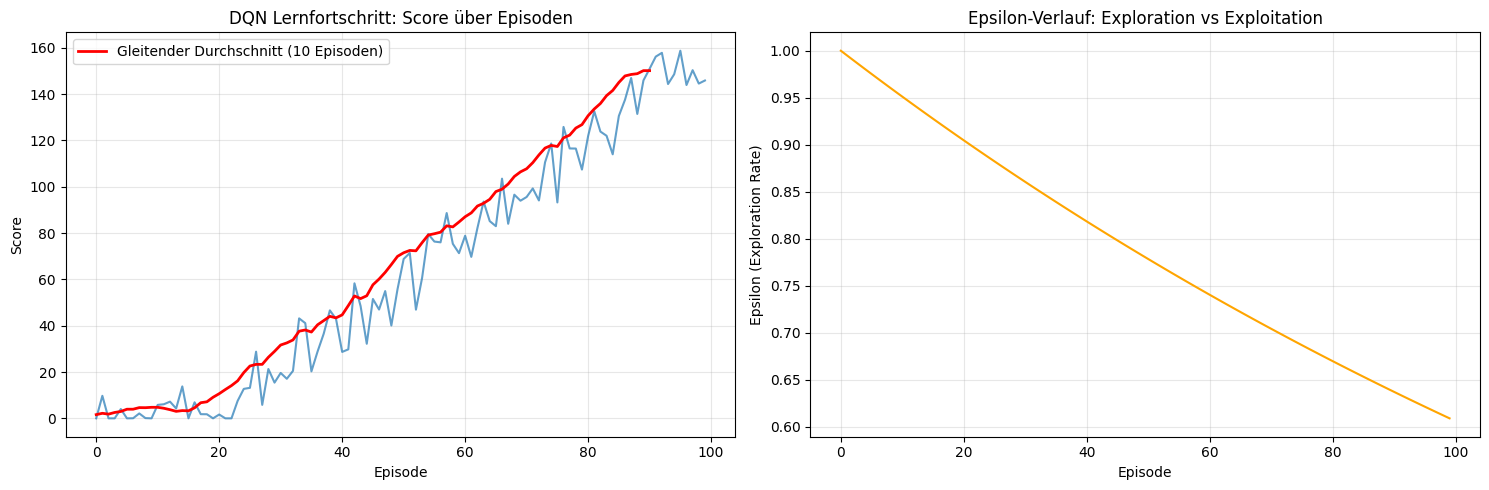


Training abgeschlossen!
Finale durchschnittliche Score (letzte 10 Episoden): 150.1
Finale Epsilon: 0.609


In [92]:
# Visualisierung der Trainingsergebnisse

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Score-Verlauf über Episoden
ax1.plot(scores, alpha=0.7)
ax1.plot(np.convolve(scores, np.ones(10)/10, mode='valid'), color='red', linewidth=2, label='Gleitender Durchschnitt (10 Episoden)')
ax1.set_title('DQN Lernfortschritt: Score über Episoden')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Score')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Epsilon-Verlauf (Exploration vs Exploitation)
ax2.plot(epsilon_values, color='orange')
ax2.set_title('Epsilon-Verlauf: Exploration vs Exploitation')
ax2.set_xlabel('Episode')
ax2.set_ylabel('Epsilon (Exploration Rate)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTraining abgeschlossen!")
print(f"Finale durchschnittliche Score (letzte 10 Episoden): {np.mean(scores[-10:]):.1f}")
print(f"Finale Epsilon: {epsilon_values[-1]:.3f}")